<center><h1> TD N°1 : SVM avec sklearn </h1></center>
    
> Utiliser la commande ```!pip install <module>``` pour installer un package sous python<br>
> Utiliser un # pour passer en commentaire si l'import d'un package vous bloque.<br>
> Si c'est un package important, il faudra résoudre le problème

## Import package

In [1]:
#Explore environnement 
import os
#Data management
import pandas as pd
import numpy as np
#Graphique
import matplotlib.pyplot as plt
#Load data
from sklearn import datasets

In [2]:
#Modélisation 
#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
#Multiclass strategie
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#Regressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#Analyser le modèle
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV

from sklearn_evaluation import plot
#Doc sklearn evaluation
#https://sklearn-evaluation.readthedocs.io/en/latest/user_guide/grid_search.html 

There's a new sklearn-evaluation version available (0.7.9), you're running 0.7.8. To upgrade: pip install sklearn-evaluation --upgrade


In [5]:
#Il faudra surement l'installer pour vous.
#Le package peut poser problème suivant la version de anaconda
from pandas_profiling import ProfileReport

#Web request
import requests
import io

## Function


In [3]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    
    '''
    
    SEULEMENT pour la fonction SVC de sklearn, pas de LINEARSVC
    
    Function qui permet de recupérer la constante et le coefficient directeur
    d'un svm après entraintement.
    
    Un svm lineaire est de la forme w0*w0+w1*x1 +b =0
    donc 
    >= x1= -w0/w1 *x0 -b/w1
    
    avoir x1 en fonction de x0 permet de tracer la zone de décision du SVM 
    et ainsi avoir une réprésentation graphique
    
    Pour calculer les marges on rajoute +- 1/w[1]
    
    
    '''
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [4]:
def svm_f_importances(coef_svm , names):
    ''' 
    Cette fonction permet de visualiser l'importance de chaque variable pour le modèle SVM
    Vous devez passer 2 arguments :
    
    - coef_svm : Les coéfficients du modèle disponible après votre .fit()
      On le récupère avec la commande suite  svc_fit.coef_[0]
      
    - names : est le nom des features que vous avez utilisée.
      ATTENTION à passer dans le même ordre que pour l'entrainement du modèle
    
    '''
    imp = coef_svm
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

#features_names = ['input1', 'input2']
#svm = svm.SVC(kernel='linear')
#svm.fit(X, Y)
#f_importances(svm.coef_[0], features_names)

## Exercice N°1 : Classification données IRIS avec un SVM


#### Exploration and data analysis (EDA)
1) Importer le dataset Iris

2) Faire des stats descriptives pour mieux comprendre le dataset

3) Recoder les données dans le bon format si nécessaire 

4) Découper le dataset en train et test

#### Modélisation binaire (2 target)

5) Importer les modèles de  **régression logistic , SVC, LinearSVC et SGDClassifier** avec sklearn

6) Choisir maximum 2 colonnes dans votre nouveau data et entrainer un SVM avec le module SVC.<br>
- 6.1) Tracer la frontière de décision de votre modèle avec la fonction fournie. Visualiser le résultat.<br>
- 6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
- 6.3) Commenter l'effet de C sur votre modèle<br>
- 6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>


7) Entrainer les 4 modèles sur les données et évaluer la performance des modèles (uniquement avec le dataset train)
   Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
   Réaliser une cross-validation pour évaluer votre modèle.<br>
   Justifier le type de cross_validation choisie.<br>

8) Imaginons que ce soit le SVM par défaut qui donne le meilleur score, tuner ce modèle pour l'améliorer
- 8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
- 8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
- 8.3) **Uniquement si vous avez le temps**, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des          *validation curve*.

9) Entrainer votre modèle sur les meilleurs hyperparamètres. 

10) Réaliser une prédiction avec votre modèle sur le dataset test.<br> 
    Evaluer la performance de votre modèle.<br>
    Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie.<br>
    Commenter les résultats


#### Modélisation multiclass

11) A partir du dataset iris avec les 3 espèces, réaliser une classification multiclass.
- 11.1) Tester les différentes méthodes, OVR et OVO  
- 11.2) Existe-il des différences entre les méthodes?

## Partie code, a vous de jouer 🐍

### Exploration and data analysis

#### 1) Importer le dataset Iris depuis sklearn

In [6]:
#1
#Import dataset from sklearn

sk_iris = datasets.load_iris()

#Transformer le datasets.laod_iris() en pandas dataframe
iris = pd.DataFrame(data= np.c_[sk_iris.data, sk_iris.target], columns=sk_iris['feature_names']+['species'] )

In [9]:
#Renommer les colonnes! Le format n'est pas adapté pour coder
#Création d'un liste contenant le nom des features, ca vous facilitera la vie par la suite
features_names = ['sepal_length','sepal_width','petal_length','petal_width','species']
iris.columns = features_names

In [10]:
#Species au mauvais format, format float. 
# On veut un integer
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [11]:
# 5 lignes au harsard dans le dataset
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
124,6.7,3.3,5.7,2.1,2.0
93,5.0,2.3,3.3,1.0,1.0
59,5.2,2.7,3.9,1.4,1.0
79,5.7,2.6,3.5,1.0,1.0
30,4.8,3.1,1.6,0.2,0.0


#### 2) Statistiques descriptives

In [12]:
#Statistiques intéréssante sur le dataframe
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
#Nb de NA par feature

iris.isna().sum(axis=0)

#Iris.isna() retourne un true/false
#sum(axis=0) va faire la sum par colonne et true=1 false=0

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [23]:
#Exemple sum booléen sous python
print(sum([True, False, True]))

2


In [26]:
#Analyse des corélations
iris.corr(method='spearman')

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.166778,0.881898,0.834289,0.798078
sepal_width,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal_length,0.881898,-0.309635,1.000000,0.937667,0.935431
petal_width,0.834289,-0.289032,0.937667,1.000000,0.938179
species,0.798078,-0.440290,0.935431,0.938179,1.000000


In [29]:
#Pour mettre un peu de pailette...
corr = iris.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.166778,0.881898,0.834289,0.798078
sepal_width,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal_length,0.881898,-0.309635,1.000000,0.937667,0.935431
petal_width,0.834289,-0.289032,0.937667,1.000000,0.938179
species,0.798078,-0.440290,0.935431,0.938179,1.000000


>Je vous laisse voir s'il y a des outliers dans le dataset

In [19]:
#Installer le package si pas déja fait
# Pas nécessaire de le faire si ca vous pose des problèmes pour l'installer
profile = ProfileReport(iris, title="Pandas Profiling Report") 


In [22]:
#Write your path to write html file
path_to_write_file = 'C:\\Users\\....'
profile.to_file(os.path.join(path_to_write_file, 'file_name.html'))

# Si vous compiler sans changer le nom du chemin ca vous donnera une erreur :)

#### 3) Recoder variables, si besoin

In [41]:
#Transformer float en int
iris['species'] = iris.species.astype('int32')

### Modélisation binaire

Attention à bien choisir un dataset contenant uniquement **2** espèces pour la modélisation

In [31]:
#On a retiré l'espèce numéro 2, on peut aussi bien retirer la 1 ou 0
bin_iris = iris[iris.species!=2]

#### 4) Découper data set en train et test

In [1277]:
X_train , X_test, y_train, y_test = train_test_split(bin_iris.iloc[:,:4],  
                                                    bin_iris['species'], 
                                                    test_size=0.2 ,
                                                    shuffle=True ,
                                                    random_state=42
                                                   )
#Shuffle permet de mélanger le dataset avant de réaliser un train split.
#Si vos données sont ordonnées par labels. Ce serait bête d'en avoir aucune dans le jeu test après le split

In [1278]:
#Target équilibrée. On retrouve bien nos 2 targets
y_train.value_counts()

1    42
0    38
Name: species, dtype: int64

In [1279]:
#Target équilibré. On retrouve bien nos 2 targets
y_test.value_counts()

0    12
1     8
Name: species, dtype: int64

#### 5) Importer les modules pour la modélisation

In [ ]:
#... au début du code

#### 6) Garder uniquement 2 colonnes du dataset et entrainer un SVM avec module SVC

6.1) Tracer la frontière de décision de votre modèle avec la fonction **plot_svc_decision_boundary**. Visualiser le résultat.<br>
6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
6.3) Commenter l'effet de $C$ sur votre modèle<br>
6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>



#### Modélisation binaire avec uniquement 2 features

⚠️ Bien que les features de IRIS sont exprimées avec la même unité "cm". **On réalise un feature scaling**

In [1280]:
#On utilise StandarScaler uniquement sur le X_train pour calculer les moyennes!
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [1281]:
# On transforme X_train et X_test avec le calcul de moyenne et std du X_train
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [1282]:
#Train model SVC

list_two_col = bin_iris.columns[0:2]

class_svc = SVC(random_state=42, kernel='linear')
class_svc.fit(X_train_sc[:,0:2], y_train)

SVC(kernel='linear', random_state=42)

In [77]:
#%matplotlib inline

#Utiliser la commande ci-dessus si votre sortie graphique n'affiche rien

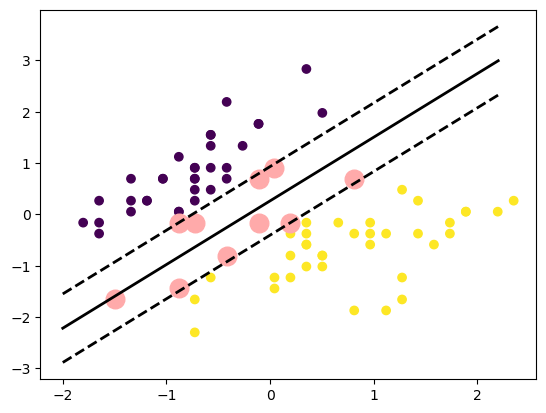

In [1283]:
#Tracer d'abord les données d'entrainement avant d'utiliser la fonction ci-dessous
#Regarder les commentaires de la fonction pour mieux comprendre, au début du notebook

plt.scatter(X_train_sc[:,0], X_train_sc[:,1], c=y_train)
plot_svc_decision_boundary(class_svc, -2, 2.2)
#-2 2.2 est à varier suivant les données que vous prenez. Ca représente l'échelle des x

### Faire varier le critère de régularisation C

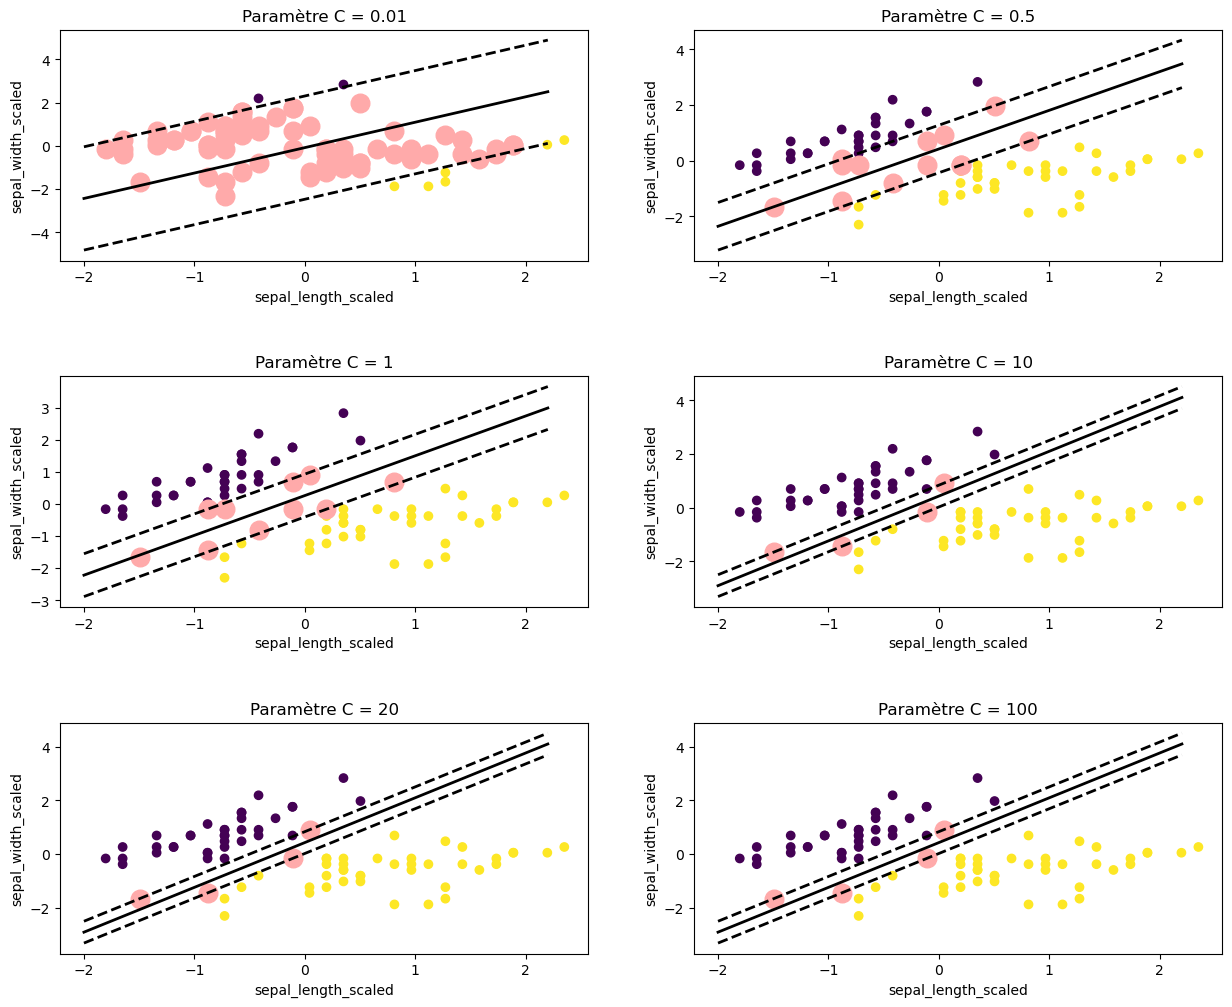

In [1286]:
#Paramètre régularisation
C = [0.01,0.5,1,10,20,100]
#Taille image et subplot 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)


for i,j  in enumerate(C):
    #Train
    class_svc = SVC(C=j , random_state=42 , kernel='linear')
    class_svc.fit(X_train_sc[:,0:2], y_train)
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    #Plot
    plt.scatter(X_train_sc[:,0], 
               X_train_sc[:,1], 
                c=y_train
               )
    plot_svc_decision_boundary(class_svc, -2, 2.2)
    plt.title('Paramètre C = '+str(j))
    plt.xlabel(list_two_col[0]+'_scaled')
    plt.ylabel(list_two_col[1]+'_scaled')
    



Plus on augmente la valeur de C plus on obtient des marges proches de la frtontière de décision.

- Une faible valeur de C autorise un nombre de 'violations' importantes à l'intérieur des marges
- Une forte valeur de C diminue le nombre de violations' à l'intérieur des marges


#### Même principe avec 2 autres features

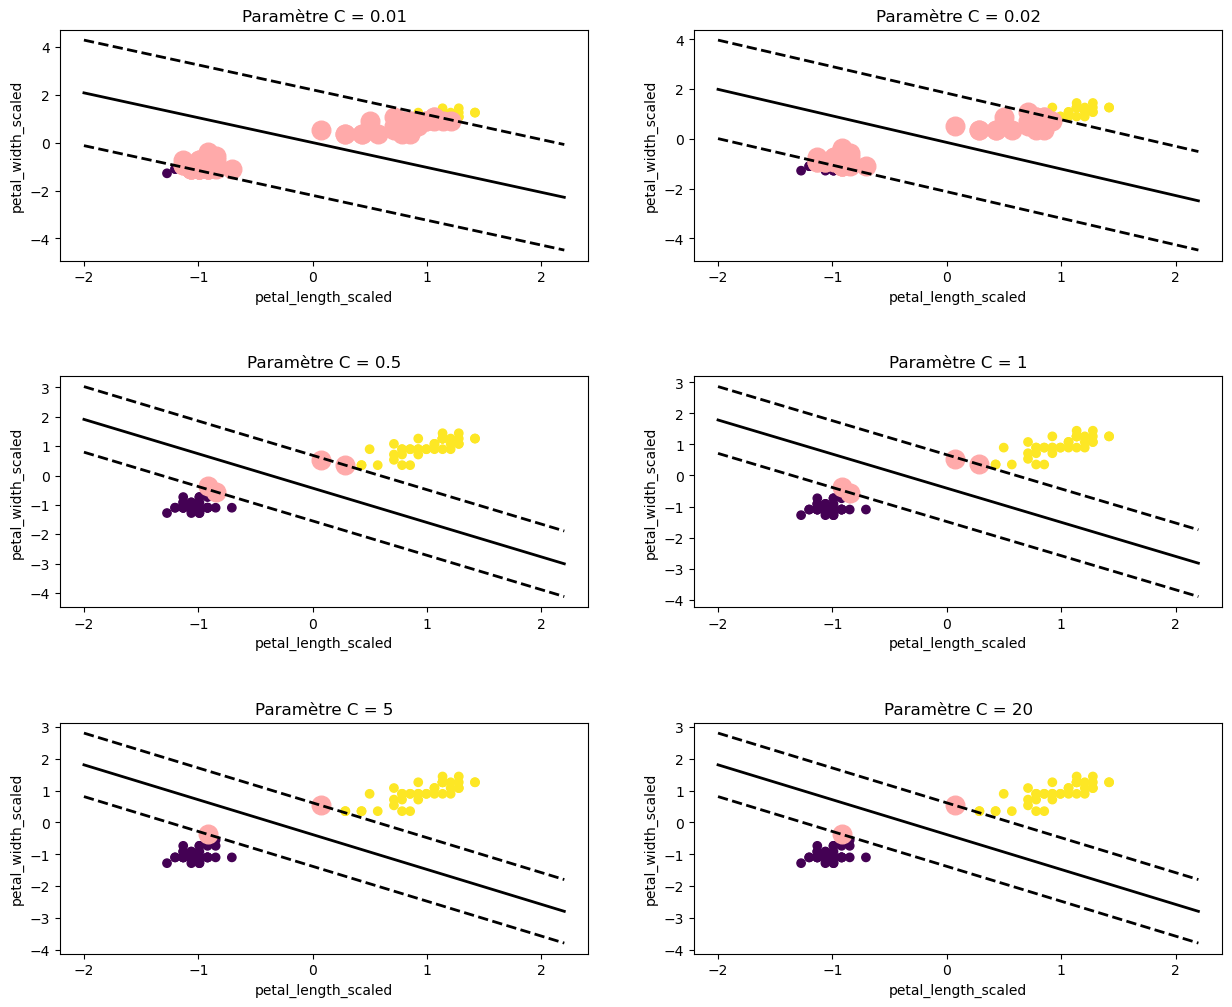

In [1293]:
#Nouveaux features

list_two_col_new = bin_iris.columns[2:4]


#Paramètre régularisation
C = [0.01,0.02,0.5,1,5,20]
#Taille image et subplot 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)


for i,j  in enumerate(C):
    #Train
    class_svc = SVC(C=j , random_state=42 , kernel='linear')
    class_svc.fit(X_train_sc[:,2:4], y_train)
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    #Plot
    plt.scatter(X_train_sc[:,2], 
               X_train_sc[:,3], 
                c=y_train
               )
    plot_svc_decision_boundary(class_svc, -2, 2.2)
    plt.title('Paramètre C = '+str(j))
    plt.xlabel(list_two_col_new[0]+'_scaled')
    plt.ylabel(list_two_col_new[1]+'_scaled')
    



#### 7) Entrainer les 4 modèles sur votre dataset d'entrainement

- LogisticRegression
- LinearSVC
- SVC
- SGDClassifier

Conseils :
- Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
- Réaliser une cross-validation pour évaluer votre modèle.<br>
- Justifier le type de cross_validation choisie.<br>

##### Charger le dataset dispo dans le fichier cours_iae/01_svm/td/data/iris_noise.csv

In [33]:
# Make sure the url is the raw version of the file on GitHub
url = "https://raw.githubusercontent.com/Roulitoo/cours_iae/master/01_SVM/td/data/iris_noise.csv" 
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

iris_noise = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=';')
iris_noise['species'] = iris_noise['species'].astype('int32')

#Colnames
features_names = iris_noise.columns[0:4]

##### Modélisation binaire, 2 target

#### Choix du modèle, justification

#### 8)  Tuner le modèle SVM pour améliorer ses performances

A vous de choirsir entre **SGDClassifier** ou **SVC** ou **LinearSVC** mais justifier pourquoi l'un ou l'autre.

8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
8.3) Uniquement si vous avez le temps, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des validation curve.

In [35]:
#Obtenir les hyperparamètres d'un modèle
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##### Choix hyperparamètre à tuner et grid search



##### Learning curve

#### 9) Entrainer votre modèle sur les hyperparamètres qui donne la meilleur performance

##### Commenter la qualité de prédiction



#### 10) Réaliser une prédiction avec votre modèle sur le dataset test. 

- Evaluer la performance de votre modèle 
- Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie 
- Commenter les résultats

#### Performance in et out sample

#### Influence de vos features sur le modèle

In [ ]:
#plt.title('nom_sympa')
#plt.xlabel('Valeur des coéfficients')
#svm_f_importances(<model_coef>, features_names)


## Exercice N°2 : Modélisation multiclass avec dataset IRIS

#### 1) Importer le dataset Iris depuis sklearn

Avec le module datasets.load_iris(). **A ce stade plus besoin d'utiliser le dataset Iris modifié.**

Ne supprimer pas la 3ème espèce de fleur, nous allons maintenant utiliser les 3 target.

#### 2 Entrainer un SVM pour une classification multiclass

- Définir la stratégie en s'appuyant sur les éléments vus en cours
- Que faut-il modifier pour que le SVM puisse faire une classification multiclass?

- Combien de modèles faut-il prédire?
- Tester avec la méthode OVO et OVR

#### Stratégie




**Nombre de modèles**




#### Test modélisation

3) Existe-t-il des différences entre OVO et OVR?

<center><h3> Merci de rendre lisible votre code, un groupe présentera ses travaux à l'oral à la fin du cours.</h3></center>